In [6]:
import csv
import numpy as np
reader = csv.reader(open("tfidf_mat.csv", "rb"), delimiter=" ")
x = list(reader)
X = np.array(x).astype("float")

In [7]:
# k means determine k
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
distortions = []
K = [10,20,30,40,50]
#range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

In [10]:
K = [60,70,80,90,100]
#range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

In [11]:
K=[10,20,30,40,50,60,70,80,90,100]

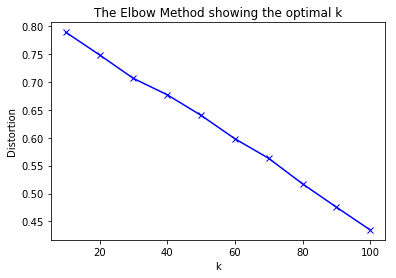

In [12]:
import matplotlib.pyplot as plt
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [13]:
#Clearly The Elbow Method using the distorsion does not work well with the data set we have
# we try by changing the metric from euclidean to cosine

In [14]:
K = [10,20,30,40,50,60,70,80,90,100]
distortionsCosine = []
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortionsCosine.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'cosine'), axis=1)) / X.shape[0])

In [15]:
def PlotTheElbow(K,disto):
    import matplotlib.pyplot as plt
    # Plot the elbow
    plt.plot(K, disto, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()

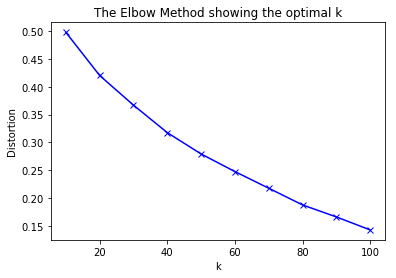

In [16]:
PlotTheElbow(K,distortionsCosine)

In [ ]:
# Elbow still not very evident, we will move to different classifiers

In [ ]:
'''
# other things to vary:
    - other metrics: ‘braycurtis’, ‘canberra’, ‘chebyshev’, ‘cityblock’, ‘correlation’, ‘cosine’, 
                    ‘dice’, ‘euclidean’, ‘hamming’, ‘jaccard’, ‘kulsinski’, ‘mahalanobis’, ‘matching’, 
                    ‘minkowski’, ‘rogerstanimoto’, ‘russellrao’, ‘seuclidean’, ‘sokalmichener’, ‘sokalsneath’, 
                    ‘sqeuclidean’, ‘wminkowski’, ‘yule’. 
    

In [ ]:
#- other quantifications of quality of clustering:  

In [17]:
from sklearn import cluster
# run 9 times kmeans and save each result in the KMeans object
KMeans = [cluster.KMeans(n_clusters = i, init="k-means++").fit(X) for i in K]

In [20]:
def compute_bic(kmeans,X):
    from scipy.spatial import distance
    """
    Computes the BIC metric for a given clusters

    Parameters:
    -----------------------------------------
    kmeans:  List of clustering object from scikit learn

    X     :  multidimension np array of data points

    Returns:
    -----------------------------------------
    BIC value
    """
    # assign centers and labels
    centers = [kmeans.cluster_centers_]
    labels  = kmeans.labels_
    #number of clusters
    m = kmeans.n_clusters
    # size of the clusters
    n = np.bincount(labels)
    #size of data set
    N, d = X.shape

    #compute variance for all clusters beforehand
    cl_var = (1.0 / (N - m) / d) * sum([sum(distance.cdist(X[np.where(labels == i)], [centers[0][i]], 
             'euclidean')**2) for i in range(m)])

    const_term = 0.5 * m * np.log(N) * (d+1)

    BIC = np.sum([n[i] * np.log(n[i]) -
               n[i] * np.log(N) -
             ((n[i] * d) / 2) * np.log(2*np.pi*cl_var) -
             ((n[i] - 1) * d/ 2) for i in range(m)]) - const_term

    return(BIC)


In [21]:
BIC = [compute_bic(kmeansi,X) for kmeansi in KMeans]

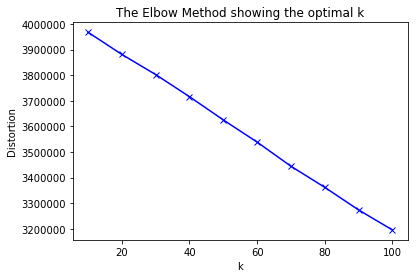

In [22]:
PlotTheElbow(K,BIC)